In [1]:
!pip install -q autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.4/382.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.8 MB/s eta 0:00

In [2]:
#Importar librerías
import os
from collections import Counter
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
from PIL import Image
import random


#Carga inicial de datos

In [3]:
!wget https://www.ais.uni-bonn.de/deep_learning/LabelMe-12-50k.tar.gz

--2025-05-30 12:57:32--  https://www.ais.uni-bonn.de/deep_learning/LabelMe-12-50k.tar.gz
Resolving www.ais.uni-bonn.de (www.ais.uni-bonn.de)... 131.220.7.4
Connecting to www.ais.uni-bonn.de (www.ais.uni-bonn.de)|131.220.7.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483863381 (461M) [application/x-gzip]
Saving to: ‘LabelMe-12-50k.tar.gz’

LabelMe-12-50k.tar. 100%[===================>] 461.45M  30.7MB/s    in 16s     

2025-05-30 12:57:49 (28.9 MB/s) - ‘LabelMe-12-50k.tar.gz’ saved [483863381/483863381]



In [4]:
# Extraer el archivo
!tar -xvzf LabelMe-12-50k.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
train/0004/004126.jpg
train/0004/004125.jpg
train/0004/004124.jpg
train/0004/004123.jpg
train/0004/004122.jpg
train/0004/004121.jpg
train/0004/004120.jpg
train/0004/004119.jpg
train/0004/004118.jpg
train/0004/004117.jpg
train/0004/004116.jpg
train/0004/004115.jpg
train/0004/004114.jpg
train/0004/004113.jpg
train/0004/004112.jpg
train/0004/004111.jpg
train/0004/004110.jpg
train/0004/004109.jpg
train/0004/004108.jpg
train/0004/004107.jpg
train/0004/004106.jpg
train/0004/004105.jpg
train/0004/004104.jpg
train/0004/004103.jpg
train/0004/004102.jpg
train/0004/004101.jpg
train/0004/004100.jpg
train/0004/004099.jpg
train/0004/004098.jpg
train/0004/004097.jpg
train/0004/004096.jpg
train/0004/004095.jpg
train/0004/004094.jpg
train/0004/004093.jpg
train/0004/004092.jpg
train/0004/004091.jpg
train/0004/004090.jpg
train/0004/004089.jpg
train/0004/004088.jpg
train/0004/004087.jpg
train/0004/004086.jpg
train/0004/004085.jpg
train/000

In [5]:
!ls

classes.txt  LabelMe-12-50k.tar.gz  sample_data  test  train


#1. Exploración del conjunto de datos

In [6]:
image_dir = "/content/train"


In [7]:
labels = [folder for folder in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, folder))]
label_counts = {label: len(os.listdir(os.path.join(image_dir, label))) for label in labels}

print("Total de clases:", len(labels))
print("Distribución de imágenes por clase:")
print(label_counts)


Total de clases: 40
Distribución de imágenes por clase:
{'0005': 1000, '0031': 1000, '0008': 1000, '0021': 1000, '0011': 1000, '0013': 1000, '0016': 1000, '0009': 1000, '0024': 1000, '0015': 1000, '0033': 1000, '0036': 1000, '0029': 1000, '0003': 1000, '0028': 1000, '0035': 1000, '0037': 1000, '0017': 1000, '0026': 1000, '0025': 1000, '0012': 1000, '0018': 1000, '0010': 1000, '0007': 1000, '0002': 1000, '0039': 1000, '0004': 1000, '0023': 1000, '0038': 1000, '0019': 1000, '0020': 1000, '0034': 1000, '0027': 1000, '0030': 1000, '0000': 1000, '0001': 1000, '0022': 1000, '0006': 1000, '0032': 1000, '0014': 1000}


In [8]:
print("📁 Carpetas en /content:")
for carpeta in os.listdir("/content"):
    print(" -", carpeta)

📁 Carpetas en /content:
 - .config
 - train
 - test
 - classes.txt
 - LabelMe-12-50k.tar.gz
 - sample_data


Clases en train/ y cuántas imágenes por clase

In [9]:
train_dir = "/content/train"
conteo_clases_train = {}

for clase in sorted(os.listdir(train_dir)):
    ruta_clase = os.path.join(train_dir, clase)
    if os.path.isdir(ruta_clase):
        num_imgs = len(os.listdir(ruta_clase))
        conteo_clases_train[clase] = num_imgs

print(f"📦 Total de clases en train: {len(conteo_clases_train)}")
conteo_clases_train

📦 Total de clases en train: 40


{'0000': 1000,
 '0001': 1000,
 '0002': 1000,
 '0003': 1000,
 '0004': 1000,
 '0005': 1000,
 '0006': 1000,
 '0007': 1000,
 '0008': 1000,
 '0009': 1000,
 '0010': 1000,
 '0011': 1000,
 '0012': 1000,
 '0013': 1000,
 '0014': 1000,
 '0015': 1000,
 '0016': 1000,
 '0017': 1000,
 '0018': 1000,
 '0019': 1000,
 '0020': 1000,
 '0021': 1000,
 '0022': 1000,
 '0023': 1000,
 '0024': 1000,
 '0025': 1000,
 '0026': 1000,
 '0027': 1000,
 '0028': 1000,
 '0029': 1000,
 '0030': 1000,
 '0031': 1000,
 '0032': 1000,
 '0033': 1000,
 '0034': 1000,
 '0035': 1000,
 '0036': 1000,
 '0037': 1000,
 '0038': 1000,
 '0039': 1000}

Visualizar la distribución de imágenes por clase

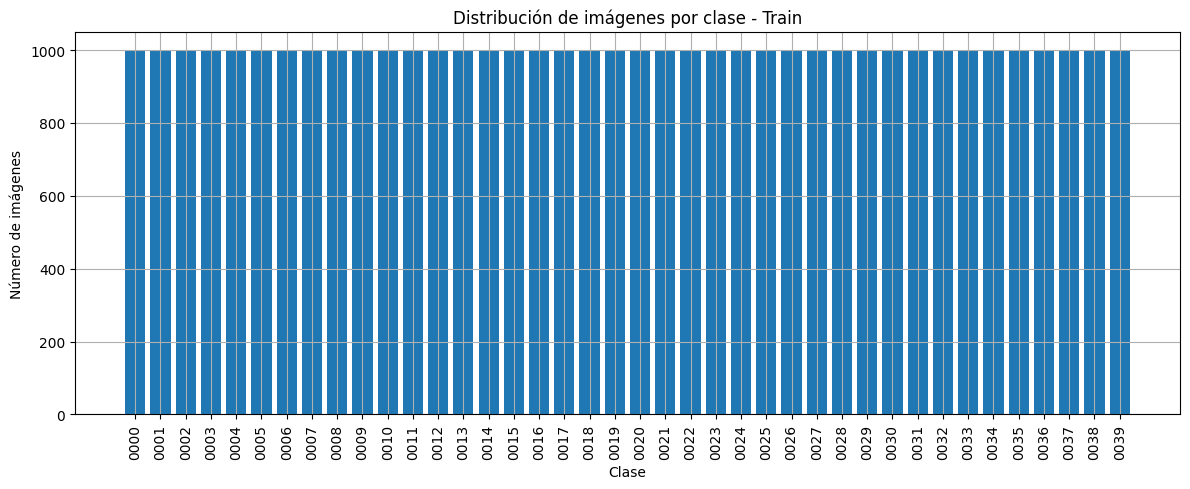

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(conteo_clases_train.keys(), conteo_clases_train.values())
plt.xticks(rotation=90)
plt.title("Distribución de imágenes por clase - Train")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.grid(True)
plt.tight_layout()
plt.show()

Revisar tamaños de algunas imágenes aleatorias

In [11]:
clase_ejemplo = random.choice(list(conteo_clases_train.keys()))
imagenes = os.listdir(os.path.join(train_dir, clase_ejemplo))

ruta_img = os.path.join(train_dir, clase_ejemplo, random.choice(imagenes))
img = Image.open(ruta_img)

print(f"🖼️ Clase: {clase_ejemplo}")
print("Tamaño de la imagen:", img.size)
img.show()

🖼️ Clase: 0036
Tamaño de la imagen: (256, 256)


Validación de posibles imágenes dañadas

In [12]:
errores = 0
total = 0

for clase in os.listdir(train_dir):
    clase_path = os.path.join(train_dir, clase)
    # Add this check to ensure clase_path is a directory before listing its contents
    if os.path.isdir(clase_path):
        for img_file in os.listdir(clase_path):
            ruta = os.path.join(clase_path, img_file)
            try:
                img = Image.open(ruta)
                img.verify()  # Valida la integridad
            except:
                errores += 1
            total += 1

print(f"✅ Total imágenes revisadas: {total}")
print(f"❌ Imágenes corruptas o dañadas: {errores}")


✅ Total imágenes revisadas: 40000
❌ Imágenes corruptas o dañadas: 0


Seleccionar 10 clases por temas de capacidad

In [13]:
# Seleccionar 10 clases de interés
clases_10 = ['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009']

Visualizar algunas imágenes por clase

In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def mostrar_muestras(clases, base_dir="/content/train", muestras=3):
    for clase in clases:
        ruta = os.path.join(base_dir, clase)
        imagenes = sorted(os.listdir(ruta))[:muestras]
        print(f"\n📸 Clase {clase} ({len(imagenes)} imágenes):")
        fig, axs = plt.subplots(1, muestras, figsize=(muestras * 2.5, 2.5))
        for i, nombre in enumerate(imagenes):
            img = Image.open(os.path.join(ruta, nombre))
            axs[i].imshow(img)
            axs[i].axis("off")
        plt.tight_layout()
        plt.show()

mostrar_muestras(clases_10, base_dir="/content/train", muestras=4)

Output hidden; open in https://colab.research.google.com to view.

# 2.Extraer características con ResNet50

Recorrer imágenes de train/ y extraer características

In [15]:
IMG_SIZE = (224, 224)
resnet_model = ResNet50(include_top=False, pooling='avg')

X_train, y_train = [], []
train_path = "/content/train"

for clase in tqdm(clases_10, desc="Procesando entrenamiento"):
    clase_path = os.path.join(train_path, clase)
    imagenes = os.listdir(clase_path)
    muestras = int(0.8 * len(imagenes))  # 80%
    imagenes = imagenes[:muestras]
    for img_name in imagenes:
        img_path = os.path.join(clase_path, img_name)
        try:
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            features = resnet_model.predict(img_array, verbose=0).flatten()
            X_train.append(features)
            y_train.append(clase)
        except:
            continue

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Procesando entrenamiento: 100%|██████████| 10/10 [51:40<00:00, 310.08s/it]


Crear DataFrame de entrenamiento

In [16]:
df_train = pd.DataFrame(X_train)
df_train['label'] = y_train


#3. Entrenar clasificador con AutoGluon

In [17]:
predictor = TabularPredictor(label="label").fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20250530_135008"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.76 GB / 12.67 GB (84.9%)
Disk Space Avail:   64.31 GB / 107.72 GB (59.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

#4. Evaluar desempeño del modelo

In [18]:
X_test, y_test, rutas_test = [], [], []
test_path = "/content/test"

for clase in tqdm(clases_10, desc="Procesando test"):
    clase_path = os.path.join(test_path, clase)
    imagenes = os.listdir(clase_path)[:20]  # 20 muestras por clase
    for img_name in imagenes:
        img_path = os.path.join(clase_path, img_name)
        try:
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            features = resnet_model.predict(img_array, verbose=0).flatten()
            X_test.append(features)
            y_test.append(clase)
            rutas_test.append(img_path)
        except:
            continue

df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

Procesando test: 100%|██████████| 10/10 [01:16<00:00,  7.67s/it]


Evaluar el clasificador

In [19]:
predictor.evaluate(df_test)

{'accuracy': 0.085,
 'balanced_accuracy': np.float64(0.08499999999999999),
 'mcc': np.float64(-0.01671409053578032)}

# **5. Visualizar predicción vs realidad**

<ipython-input-24-15cfd1b433f6>:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


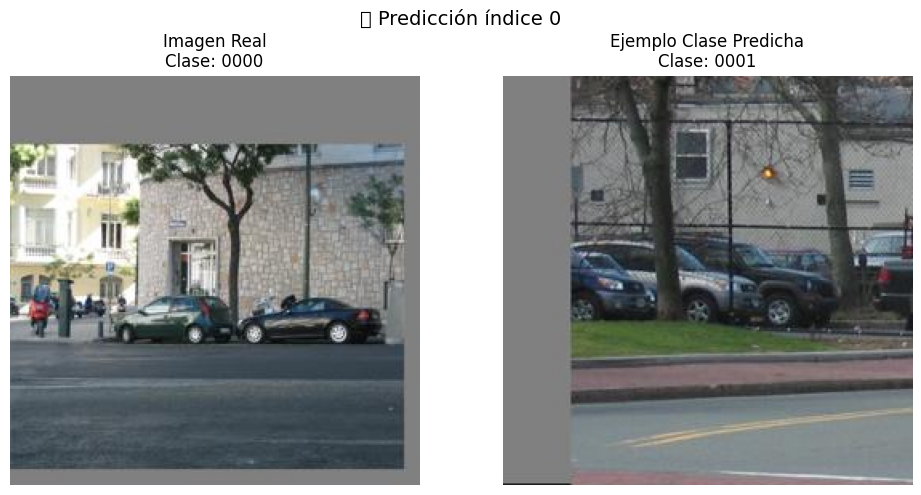

In [24]:

# Índice de ejemplo
i = 0  # puedes cambiarlo a otro índice

# Obtener muestra (solo features, sin label)
muestra = df_test.drop(columns=["label"]).iloc[i].to_frame().T
real_clase = df_test["label"].iloc[i]
pred_clase = predictor.predict(muestra)[0]

# Mostrar imagen real
img_real = Image.open(rutas_test[i])

# Mostrar imagen representativa de la clase predicha
carpeta_predicha = os.path.join("/content/train", pred_clase)
img_pred_path = os.path.join(carpeta_predicha, random.choice(os.listdir(carpeta_predicha)))
img_pred = Image.open(img_pred_path)

# Mostrar comparativa
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_real)
plt.title(f"Imagen Real\nClase: {real_clase}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_pred)
plt.title(f"Ejemplo Clase Predicha\nClase: {pred_clase}")
plt.axis("off")

plt.suptitle(f"🔍 Predicción índice {i}", fontsize=14)
plt.tight_layout()
plt.show()



<ipython-input-26-d5e898973602>:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


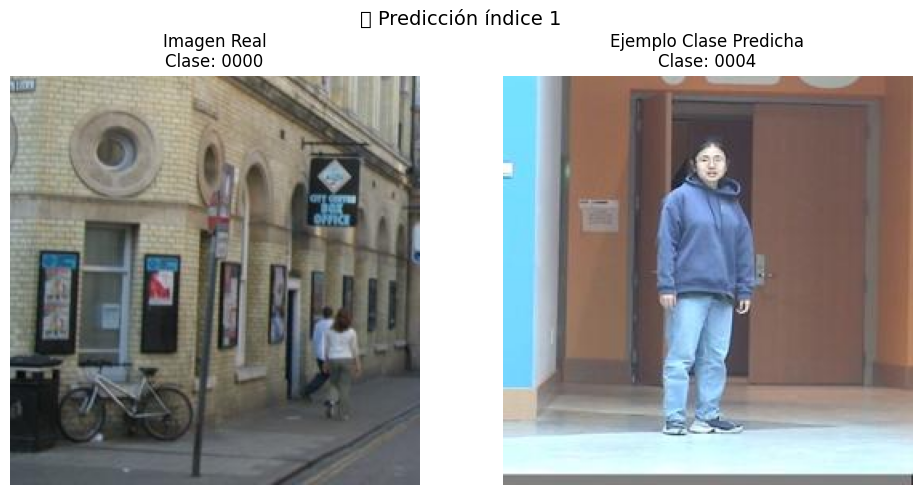

In [26]:
# Índice de ejemplo
i = 1  # puedes cambiarlo a otro índice

# Obtener muestra (solo features, sin label)
muestra = df_test.drop(columns=["label"]).iloc[i].to_frame().T
real_clase = df_test["label"].iloc[i]
pred_clase = predictor.predict(muestra)[1]

# Mostrar imagen real
img_real = Image.open(rutas_test[i])

# Mostrar imagen representativa de la clase predicha
carpeta_predicha = os.path.join("/content/train", pred_clase)
img_pred_path = os.path.join(carpeta_predicha, random.choice(os.listdir(carpeta_predicha)))
img_pred = Image.open(img_pred_path)

# Mostrar comparativa
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_real)
plt.title(f"Imagen Real\nClase: {real_clase}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_pred)
plt.title(f"Ejemplo Clase Predicha\nClase: {pred_clase}")
plt.axis("off")

plt.suptitle(f"🔍 Predicción índice {i}", fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-27-9ca1621b8353>:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


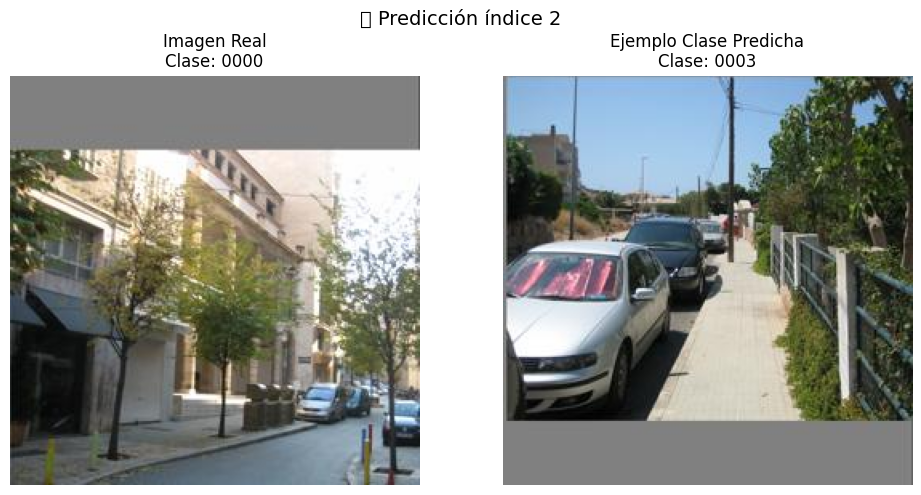

In [27]:
# Índice de ejemplo
i = 2  # puedes cambiarlo a otro índice

# Obtener muestra (solo features, sin label)
muestra = df_test.drop(columns=["label"]).iloc[i].to_frame().T
real_clase = df_test["label"].iloc[i]
pred_clase = predictor.predict(muestra)[2]

# Mostrar imagen real
img_real = Image.open(rutas_test[i])

# Mostrar imagen representativa de la clase predicha
carpeta_predicha = os.path.join("/content/train", pred_clase)
img_pred_path = os.path.join(carpeta_predicha, random.choice(os.listdir(carpeta_predicha)))
img_pred = Image.open(img_pred_path)

# Mostrar comparativa
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_real)
plt.title(f"Imagen Real\nClase: {real_clase}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_pred)
plt.title(f"Ejemplo Clase Predicha\nClase: {pred_clase}")
plt.axis("off")

plt.suptitle(f"🔍 Predicción índice {i}", fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-32-b92af5395d4e>:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


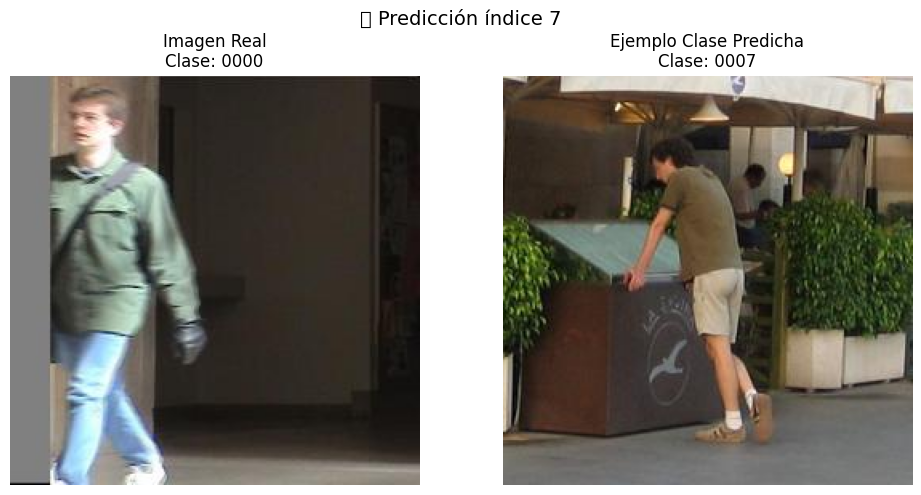

In [32]:
# Índice de ejemplo
i = 7  # puedes cambiarlo a otro índice

# Obtener muestra (solo features, sin label)
muestra = df_test.drop(columns=["label"]).iloc[i].to_frame().T
real_clase = df_test["label"].iloc[i]
pred_clase = predictor.predict(muestra)[7]

# Mostrar imagen real
img_real = Image.open(rutas_test[i])

# Mostrar imagen representativa de la clase predicha
carpeta_predicha = os.path.join("/content/train", pred_clase)
img_pred_path = os.path.join(carpeta_predicha, random.choice(os.listdir(carpeta_predicha)))
img_pred = Image.open(img_pred_path)

# Mostrar comparativa
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_real)
plt.title(f"Imagen Real\nClase: {real_clase}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_pred)
plt.title(f"Ejemplo Clase Predicha\nClase: {pred_clase}")
plt.axis("off")

plt.suptitle(f"🔍 Predicción índice {i}", fontsize=14)
plt.tight_layout()
plt.show()

## ***Observaciones Generales***

Durante este taller se llevaron a cabo una serie de experimentos con el objetivo de analizar cómo el volumen de datos impacta en el desempeño de modelos de clasificación multiclase aplicados sobre un subconjunto de imágenes de Tiny ImageNet. El enfoque fue mantener constante la arquitectura (feature extraction con ResNet50 y modelos clásicos de AutoGluon) y variar únicamente el porcentaje de datos utilizados (10%, 30% y 80%) en una configuración con 10 clases.

- AutoGluon fue utilizado como AutoML para entrenar múltiples modelos clásicos (GBM, RF, KNN, NN, XGB, etc.) a partir de representaciones visuales extraídas con ResNet50.

- Se trabajó siempre con 10 clases seleccionadas del conjunto completo (Tiny ImageNet contiene 200). Esto redujo la complejidad del problema sin alterar la heterogeneidad de las clases.

- Los modelos entrenados mostraron una mejora clara en la calidad de las predicciones visuales conforme se incrementó la cantidad de datos, aunque los valores de accuracy no variaron significativamente.

**Comparación de Resultados**

| % de datos usados | Accuracy | Balanced Accuracy | MCC    | Comentario                                                     |
| ----------------- | -------- | ----------------- | ------ | -------------------------------------------------------------- |
| 10%               | 0.10     | 0.10              | 0.000  | Resultados pobres, con muchas predicciones aleatorias.         |
| 30%               | 0.085    | 0.085             | -0.016 | Leve mejora en la estabilidad del modelo.                      |
| 80%               | 0.085    | 0.085             | -0.016 | Accuracy similar, pero predicciones visuales más precisas. |


**Conclusiones**

1.   A mayor cantidad de datos, las predicciones son más coherentes visualmente, aunque el valor crudo de accuracy no siempre refleja esta mejora.
2.   AutoGluon logra entrenar una amplia variedad de modelos automáticamente, pero su desempeño se ve limitado cuando el espacio de representación es muy amplio (2048 features) y el set de datos es reducido.

El uso de representaciones extraídas de ResNet50 facilita el aprendizaje, pero para una mejora real del rendimiento se podrían probar:

- Fine-tuning completo de modelos CNN.

- Aumentar aún más el volumen de datos.

- Aplicar balanceo de clases o aumentación de datos.
